#### TOC
1. Anomalies in Data, and cleaning action & explaination. 15 pts
2. Pairwise Corralation Table and explaition. 10 pts
3. Average records stockID vs Day, 25 pts
    - a. autocorrelation, 10 pts
    - b. measure the distance, 5 pts
    - c. clustering algorithm, 10 pts
4. Closing trajectory of stocks on each day highly correlated, 25 pts
   - a. Make three plots, 10 pts
   - b. permutation test to determine the statistical confidence, 15 pts
      p-value
5. Best prediction model, any approaches, 25 pts
6. submit model on Kaggle, 0 pts

#### Start
- Copy this notebook.
  In Google Colab use `File -> Save a Copy in Drive`.
- Use the "Text" blocks to provide explanations wherever you find them necessary.
- Highlight your answers inside these text fields to ensure that we don't miss it
while grading your HW.

#### Setup

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and
uploading it to your drive), you can skip this section.

In [ ]:
## First mount your drive before running analysis code
from google.colab import drive
drive.mount('/content/drive')

# Connecting to Data Folder.
%cd /content/drive/MyDrive/optiver-trading-at-the-close


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/optiver-trading-at-the-close


In [ ]:
## packages
!pip install -q kaggle
!pip install -q pandas
!pip install -q scikit-learn
!pip install -q numpy
!pip install -q Matplotlib
!pip install -q seaborn


In [ ]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !kaggle competitions download -c optiver-trading-at-the-close
# !unzip optiver-trading-at-the-close.zip
!ls

example_test_files  optiver2023  public_timeseries_testing_util.py  train.csv


#### Q1: Anomalies and Cleaning, 15 pts


Anamolies found by observing data:

*  Found missing values/data in all columns
*  Observed outliers for reference price, bid price and ask price

Addressing these missing values and outliers is crucial as they can significantly impact our subsequent analyses and predictions related to stocks. The methods I've chosen for handling missing values and outliers align with best practices in data preprocessing and help maintain the integrity of our data for further analysis and modeling.

**For Missing values:**

I found missing data in all columns of dataset. To address this issue, I decided to replace the missing values with the mean of the respective stock's data. This is a common method for handling missing data in datasets. Imputing with the mean helps us maintain the statistical properties of the original data, such as the mean and variance. Furthermore, this approach typically has a minimal impact on the relationships between variables, ensuring that we don't introduce strong correlations or biases into the data.

**For Outliers:**

Found Outliers in the required columns by considering threshold as 3 as values more than 3 standard deviations are considered outliers. Now replaced these values with median as the median is a robust statistic, meaning it is not influenced by extreme values. In contrast, the mean is highly sensitive to outliers because it takes their magnitude into account. By using the median, we are essentially replacing outliers with a value that is close to the center of the data's distribution. This helps preserve the overall shape of the data distribution and is particularly useful when the distribution is not symmetrical or is skewed.

**Checking Duplicates:**

Checking duplicates is one of the cleaning data technique. Here I have applied to check if there are any duplicates in the given stock data and found there are no duplicate records.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

col_names = [
  "stock_id",
  "date_id",
  "seconds_in_bucket",
  "imbalance_size",
  "imbalance_buy_sell_flag",
  "reference_price",
  "matched_size",
  "far_price",
  "near_price",
  "bid_price",
  "bid_size",
  "ask_price",
  "ask_size",
  "wap",
  "target",
  "time_id",
  "row_id"
]
dtypes = {
  "stock_id": np.int,
  "date_id":np.int,
  "seconds_in_bucket":np.int,
  "imbalance_size":np.float64,
  "imbalance_buy_sell_flag":np.int,
  "reference_price":np.float64,
  "matched_size":np.float64,
  "far_price":np.float64,
  "near_price":np.float64,
  "bid_price":np.float64,
  "bid_size":np.float64,
  "ask_price":np.float64,
  "ask_size":np.float64,
  "wap":np.float64,
  "target":np.float64,
  "time_id":np.int,
  "row_id": "string",
}
csv = pd.read_csv("train.csv")


<ipython-input-4-ac28b01514d1>:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  "stock_id": np.int,
<ipython-input-4-ac28b01514d1>:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and

In [ ]:
from scipy import stats
from scipy.stats import pearsonr

#Replacing the empty values with mean of respective columns as all values are required for further analysis
#as removing the empty columns would be loss of data

csv['imbalance_size'].fillna(csv['imbalance_size'].mean(), inplace=True)
csv['reference_price'].fillna(csv['reference_price'].mean(), inplace=True)
csv['matched_size'].fillna(csv['matched_size'].mean(), inplace=True)
csv['far_price'].fillna(csv['far_price'].median(), inplace=True)
csv['near_price'].fillna(csv['near_price'].mean(), inplace=True)
csv['bid_price'].fillna(csv['bid_price'].mean(), inplace=True)
csv['ask_price'].fillna(csv['ask_price'].mean(), inplace=True)
csv['wap'].fillna(csv['wap'].mean(), inplace=True)
csv['target'].fillna(csv['target'].mean(), inplace=True)

cleaned_stock_data = pd.DataFrame()
cleaned_stock_data = csv

# Considering outliers for reference_price, bid_price and ask_price
columns = ['reference_price', 'bid_price', 'ask_price']
# Taking threshold value 3 as values more than 3 standard deviations are considered as outliers
z_score_threshold = 3

# Iterate through selected columns, calculate Z-scores, and replace outliers with the median
for column_name in columns:
    z_scores = stats.zscore(cleaned_stock_data[column_name])
    outliers = (z_scores > z_score_threshold) | (z_scores < -z_score_threshold)
    # Replacing outliers with the column's median
    if outliers.any():
        median_value = cleaned_stock_data[column_name].median()
        cleaned_stock_data.loc[outliers, column_name] = median_value


# Calculating the new 'wap' values using the formula
cleaned_stock_data['wap'].fillna((cleaned_stock_data['bid_price'] * cleaned_stock_data['ask_size'] + cleaned_stock_data['ask_price'] * cleaned_stock_data['bid_size']) / (cleaned_stock_data['bid_size'] + cleaned_stock_data['ask_size']), inplace=True)

# after filling the values from the above formula i had got null values in side wap column. So, i had removed the data
# where ask_size + bid_size is equal to zero

# Counting the number of rows where ask_size + bid_size is equal to 0
zero_size_count = len(cleaned_stock_data[cleaned_stock_data['ask_size'] + cleaned_stock_data['bid_size'] == 0])

# Check if zero_size_count is greater than 0 before deleting rows
if zero_size_count > 0:
    cleaned_stock_data = cleaned_stock_data[cleaned_stock_data['ask_size'] + cleaned_stock_data['bid_size'] != 0]

# deleting that one row where the target value is missing
cleaned_stock_data = cleaned_stock_data.dropna(subset=['target'])

# Drop duplicates based on specific columns
cleaned_stock_data = cleaned_stock_data.drop_duplicates()

cleaned_stock_data


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,0.999883,0.999660,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,0.999883,0.999660,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,0.999883,0.999660,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,0.999883,0.999660,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,0.999883,0.999660,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


#### Q2: Pairwise Corralation Table and Explaition. 10 pts


<ipython-input-42-8063b7627fd5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cleaned_stock_data.corr(method='pearson')


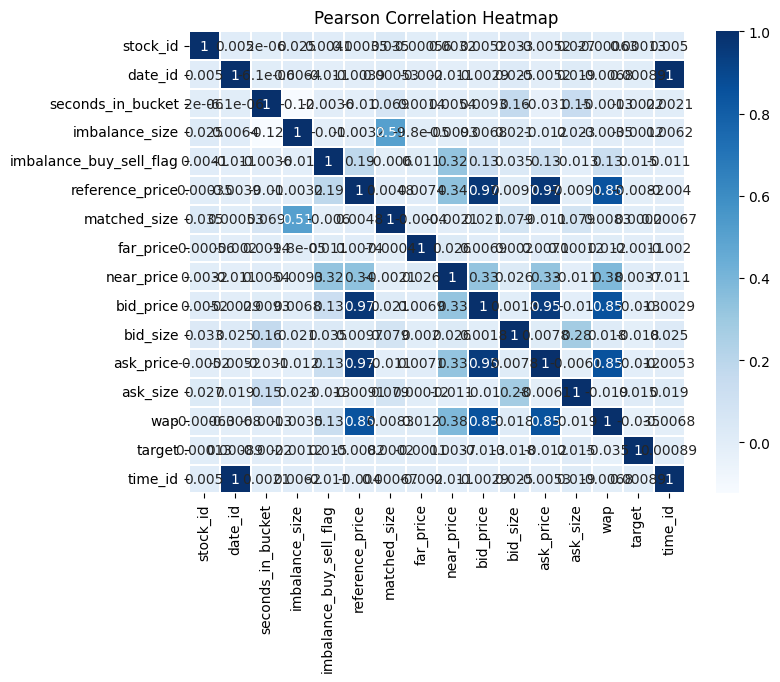

In [ ]:
# Calculate the Pearson correlation matrix
correlation_matrix = cleaned_stock_data.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.25)
plt.title('Pearson Correlation Heatmap')
plt.show()

From the above pearson correlation matrix, it can be found that reference_price and ask_price has the highest correlation of 0.99. Perhaps the reason for this high correlation might be that Market orders, where traders buy or sell at the current market price (which is often close to the ask or bid price), can affect both the reference_price and ask_price. Traders may execute market orders based on the reference_price, leading to a correlation between the two.

Another pair that has high correlation is bid_price and wap as from the calculation of wap it can be observed that bid_price directly contributes to the calculation of WAP, hence a strong correlation is expected between these two variables and also rapid changes in bid_price can quickly affect WAP. For example, if there's a sudden influx of buy orders that pushes the bid_price higher, this can lead to a corresponding increase in WAP.

Highest correlation is also present between reference_price and bid_price as  the bid_price and reference_price are often closely related because the reference_price is a reference point for the current trading activity, and the bid_price is the highest price a buyer is willing to pay for the stock. The bid_price is one component that can influence the reference_price, especially if the stock is highly liquid with a narrow bid-ask spread.

#### Q3: Average records stockID vs Day, 25 pts
distance function between entries
- a. autocorrelation, 10 pts
- b. measure the distance, 5 pts
- c. clustering algorithm, 10 pts



In [ ]:
# Group by 'stock_id' and 'date_id' and calculate the average of selected columns
required_columns = ['far_price', 'near_price','imbalance_size','reference_price','matched_size','bid_price','bid_size','ask_price','ask_size']
consensus = csv.groupby(['stock_id', 'date_id'])[required_columns].mean().reset_index()
# Display the DataFrame with the new 'Average_Performance' column
consensus_rounded = consensus.round(3)
consensus_rounded

,stock_id,date_id,far_price,near_price,imbalance_size,reference_price,matched_size,bid_price,bid_size,ask_price,ask_size
0,0,0,1.000,1.000,1229794.014,1.000,2.064913e+07,1.000,36503.148,1.000,34108.372
1,0,1,1.004,1.001,1175555.355,0.999,9.342939e+06,0.999,39277.045,0.999,25393.019
2,0,2,0.999,0.999,15930.841,0.999,1.306975e+07,0.999,34400.523,0.999,37903.561
3,0,3,0.996,0.972,5396967.761,0.999,1.414532e+07,0.999,45016.868,0.999,75358.912
4,0,4,0.993,0.994,4132773.734,1.001,1.882983e+07,1.001,31768.837,1.001,56905.172
...,...,...,...,...,...,...,...,...,...,...,...
95231,199,476,1.006,1.002,2294683.257,1.001,2.089265e+07,1.000,83208.704,1.001,93354.228
95232,199,477,0.984,0.989,3827351.750,0.998,1.337857e+07,0.998,62637.860,0.998,62630.512
95233,199,478,1.006,1.002,1095056.600,1.001,1.080398e+07,1.001,75990.766,1.001,67328.337
95234,199,479,1.016,1.010,2343566.455,1.002,2.773323e+07,1.002,91019.942,1.002,50871.530


To create an "average" or "consensus" record for each stock on a particular day, measuring the stock's performance at the day's close, I selected key columns that are likely to impact the stock's performance. These columns include 'far_price', 'near_price', 'imbalance_size', 'reference_price', 'matched_size', 'bid_price', 'bid_size', 'ask_price', and 'ask_size'.

The process to generate the consensus table is as follows:
Grouping: I organized the stock records by grouping them based on the stock's identifier ('stock_id') and the specific day ('date_id').
Averaging: Within each group, I calculated the mean value for each of the selected columns. This approach helps in summarizing how the stock performed on that particular day.
Rounding: To maintain data clarity and readability, I rounded these mean values to three decimal places.

The result is the 'consensus_rounded' data frame, which provides a consolidated view of each stock's performance on a specific day, with the selected columns representing the average or consensus values. This approach allows for easier analysis and comparison of stock performance across different days and stocks.

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

# Define the number of days to consider above and below the current date
days_to_consider = 10

columns_to_compare = ['far_price', 'near_price', 'imbalance_size', 'reference_price', 'matched_size', 'bid_price', 'bid_size', 'ask_price', 'ask_size']

# Create a function to calculate avg_ed_dist - average euclidian distance
def calculate_avg_ed_dist(df, days_to_consider):
    df['avg_ed_dist'] = np.nan
    unique_stock_ids = df['stock_id'].unique()

    for stock_id in unique_stock_ids:
        stock_data = df[df['stock_id'] == stock_id].copy()

        for _, row in stock_data.iterrows():
            date_id = row['date_id']
            lower = max(0, date_id - days_to_consider)
            upper = min(max(stock_data['date_id']), date_id + days_to_consider)

            selected_data = stock_data[(stock_data['date_id'] >= lower) & (stock_data['date_id'] <= upper)]

            if len(selected_data) > 1:
                distances = cdist(np.array(selected_data[columns_to_compare]), np.array(row[columns_to_compare]).reshape(1, -1))
                avg_distance = distances.mean()
                df.loc[(df['stock_id'] == stock_id) & (df['date_id'] == date_id), 'avg_ed_dist'] = avg_distance

    return df

# Add the 'avg_ed_dist' column to the DataFrame
result_df = calculate_avg_ed_dist(consensus_rounded, days_to_consider)

# Print the updated DataFrame
result_df

,stock_id,date_id,far_price,near_price,imbalance_size,reference_price,matched_size,bid_price,bid_size,ask_price,ask_size,avg_ed_dist
0,0,0,1.000,1.000,1229794.014,1.000,2.064913e+07,1.000,36503.148,1.000,34108.372,7.620882e+06
1,0,1,1.004,1.001,1175555.355,0.999,9.342939e+06,0.999,39277.045,0.999,25393.019,4.148237e+06
2,0,2,0.999,0.999,15930.841,0.999,1.306975e+07,0.999,34400.523,0.999,37903.561,3.728335e+06
3,0,3,0.996,0.972,5396967.761,0.999,1.414532e+07,0.999,45016.868,0.999,75358.912,5.060051e+06
4,0,4,0.993,0.994,4132773.734,1.001,1.882983e+07,1.001,31768.837,1.001,56905.172,6.792854e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
95231,199,476,1.006,1.002,2294683.257,1.001,2.089265e+07,1.000,83208.704,1.001,93354.228,1.618888e+07
95232,199,477,0.984,0.989,3827351.750,0.998,1.337857e+07,0.998,62637.860,0.998,62630.512,1.873102e+07
95233,199,478,1.006,1.002,1095056.600,1.001,1.080398e+07,1.001,75990.766,1.001,67328.337,2.163921e+07
95234,199,479,1.016,1.010,2343566.455,1.002,2.773323e+07,1.002,91019.942,1.002,50871.530,2.039382e+07


To establish a distance function for assessing the relationship between stock performance on different days, I utilized the Euclidean distance as a measure.

Process:

**Unique Stock Identification**: Initially, I identified all unique stocks present in the 'consensus_rounded' data frame. This step helped define the stock entities for further analysis.

**Pairwise Distance Calculation**: For each stock on a given day, I considered the average values of selected attributes for the ten days prior and the ten days following that specific day. I then calculated the Euclidean distance between each pair of these 21-day sequences. The Euclidean distance provides a quantitative measure of the dissimilarity between two sequences.

**Mean Calculation**: After computing the Euclidean distances for all pairs, I calculated the mean distance. This average Euclidean distance represents the typical divergence between the performance of a stock on a specific day and its performance over the surrounding ten days.

**Storage and Analysis**: I repeated this procedure for all stocks on all days and stored the resulting average Euclidean distances in a structured manner, where each row corresponds to a stock-day pair. This dataset of average Euclidean distances serves as a basis for establishing relationships between stock-day pairs and assessing how correlated they are in terms of performance.

The Euclidean distances provide a measure of how similar or dissimilar the performance of a stock is on a given day compared to its recent past and future. This analysis can help identify patterns, trends, or anomalies in the behavior of stocks over time and serve as a valuable tool for understanding stock market dynamics.

In [ ]:
autocorrelation_df = result_df.groupby('stock_id')['avg_ed_dist'].apply(lambda group: group.autocorr()).reset_index(name='autocorrelation')
autocorrelation_df

,stock_id,autocorrelation
0,0,0.068540
1,1,0.176823
2,2,0.128822
3,3,0.097832
4,4,0.227255
...,...,...
195,195,0.097232
196,196,0.145646
197,197,0.097157
198,198,0.120324


Auto correlation is found by grouping the above table on stock_id and storing the result in new data frame for further analysis

In [ ]:
print(autocorrelation_df[autocorrelation_df['autocorrelation'] == autocorrelation_df['autocorrelation'].max()])

    stock_id  autocorrelation
51        51         0.635009


Auto-correlation measures the correlation of a time series data with itself at different lags (time intervals). When a particular stock has the highest auto-correlation value, it indicates that the stock's price or performance is influenced by its own past values.
Here stock 51 has highest autocorrelation which indicates that the stock's price or performance is influenced by its own past values.

In [ ]:
print(autocorrelation_df[autocorrelation_df['autocorrelation'] == autocorrelation_df['autocorrelation'].min()])

    stock_id  autocorrelation
55        55         0.042742


Some stocks, particularly those in efficient markets, exhibit a random walk behavior. This means that their price movements are largely independent of past price movements. As a result, their auto-correlation tends to be low, indicating that past prices do not provide much information about future prices.

For the given data stock 55 has least autocorrelation which which indicates that the stock's price or performance is least influenced by its own past values and also If a stock is frequently affected by external news and events, its auto-correlation may decrease. Major news events can disrupt the continuity of past price trends, making them less predictive.

In [ ]:
# Get a list of unique stock IDs
unique_stocks = consensus_rounded['stock_id'].unique()
# Create a DataFrame to store distances
distances_df = pd.DataFrame(index=unique_stocks, columns=unique_stocks)

for stock_a in unique_stocks:
    for stock_b in unique_stocks:
        if stock_a != stock_b:
            prices_a = consensus_rounded[(consensus_rounded['stock_id'] == stock_a)]['avg_ed_dist'].values.mean()
            prices_b = consensus_rounded[(consensus_rounded['stock_id'] == stock_b)]['avg_ed_dist'].values.mean()
            avg_distance = np.abs(prices_a - prices_b)
            distances_df.loc[stock_a, stock_b] = avg_distance
distances_df

# Identify pairs of stocks that are unusually similar on a consistent basis
threshold = 30000  # Adjust this threshold as needed
similar_pairs = []

for stock_a in unique_stocks:
    for stock_b in unique_stocks:
        if stock_a != stock_b:
            avg_distance = distances_df.loc[stock_a, stock_b]
            if avg_distance <= threshold:
                similar_pairs.append((stock_a, stock_b, avg_distance))

# Print pairs of stocks that are unusually similar
print("Pairs of stocks that are unusually similar:")
for pair in similar_pairs:
    print(f"{pair[0]} and {pair[1]} have an average distance of {pair[2]}.")


Pairs of stocks that are unusually similar:
7 and 36 have an average distance of 4045.352942183614.
9 and 127 have an average distance of 14633.62623873353.
16 and 43 have an average distance of 13007.485616199672.
24 and 139 have an average distance of 20653.795486262068.
25 and 99 have an average distance of 3524.748666860163.
26 and 86 have an average distance of 11333.098006851971.
27 and 128 have an average distance of 7585.612944258377.
30 and 177 have an average distance of 9869.903695449233.
32 and 49 have an average distance of 17443.36703711562.
32 and 197 have an average distance of 11358.816164137796.
36 and 7 have an average distance of 4045.352942183614.
40 and 165 have an average distance of 29211.561592212878.
43 and 16 have an average distance of 13007.485616199672.
44 and 60 have an average distance of 6125.917606659234.
48 and 149 have an average distance of 11650.260227482766.
49 and 32 have an average distance of 17443.36703711562.
49 and 197 have an average distan

Above are the stock pairs that are unusually similar on a consistent basis.
Following can be interpreted from them:
Stock pairs with the least distance function, typically those with the smallest Euclidean distances, represent pairs of stocks that have exhibited the most similar historical price or performance patterns over the selected time frame. Stocks with the least distance function have moved in a highly correlated manner over the specified time window. This suggests that they tend to respond to market forces, news, and external factors in a similar way.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Standardize the data (optional)
scaler = StandardScaler()
average_records_scaled = scaler.fit_transform(consensus_rounded)

# Step 3: Choose the number of clusters (k)
# You can use the elbow method or other techniques to determine k
# For demonstration, let's assume k=5.
k = 5

# Step 4: Apply k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(average_records_scaled)

# Add cluster labels to the consensus_records DataFrame
consensus_rounded['cluster'] = cluster_labels

# Step 5: Analyze the clusters
# You can analyze the clusters by examining their properties and sizes.
threshold=10
cluster_sizes = consensus_rounded['cluster'].value_counts()
num_big_clusters = len(cluster_sizes[cluster_sizes > threshold])  # Define a threshold for "big" clusters

print(f"Number of big clusters: {num_big_clusters}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of big clusters: 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


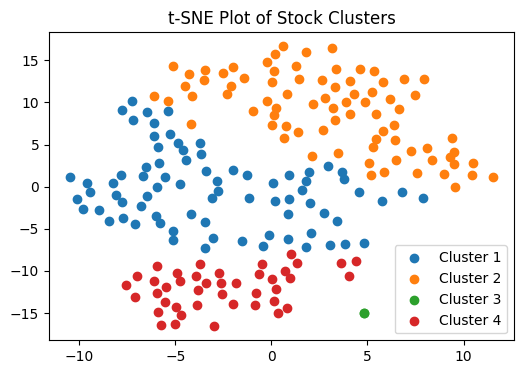

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load your data into a DataFrame (replace with your actual data)

# Step 1: Construct the "Consensus" Record
consensus_records = consensus_rounded.groupby('stock_id').mean()
# consensus_records

# Step 2: Feature Selection
selected_features = ['far_price', 'near_price', 'reference_price']
# Replace with your feature names
consensus_data = consensus_records[selected_features]

# Step 3: Standardize the Data
scaler = StandardScaler()
consensus_data_scaled = scaler.fit_transform(consensus_data)

# Step 4: Apply K-Means Clustering
k = 4  # Replace with the chosen number of clusters (optimal k)
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(consensus_data_scaled)

# Step 5: Visualize the Clusters using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_data = tsne.fit_transform(consensus_data_scaled)

# Create a scatter plot with color-coded clusters
plt.figure(figsize=(6, 4))
for i in range(k):
    plt.scatter(tsne_data[cluster_labels == i, 0], tsne_data[cluster_labels == i, 1], label=f'Cluster {i + 1}')

plt.legend()
plt.title('t-SNE Plot of Stock Clusters')
plt.show()

A subset of features is selected for clustering. In this case, the selected features are 'far_price,' 'near_price,' and 'reference_price.' The selected features are standardized using the StandardScaler from scikit-learn. Standardization scales the data to have a mean of 0 and a standard deviation of 1, which is important for K-Means clustering. K-Means clustering is performed on the standardized data.

Visualize the Clusters using t-SNE:

The code then plots a scatter plot where each point corresponds to a stock in the t-SNE space. The points are color-coded by cluster label, allowing us to visually assess how stocks cluster together based on the selected features.

**Plot Analysis:**

From the result plot, we can conclude that the stocks are not visually coherant because there is high intra-cluster variance meaning that data points within the same cluster are not close to each other and low Inter-cluster Variance meaning that the clusters are very close to each other which indicates that the stocks are not coherant to each other.

#### Q4: Closing trajectory of stocks on each day highly correlated, 25 pts
- a. Make three plots, 10 pts
- b. permutation test for statistical confidence, p-value, 15 pts


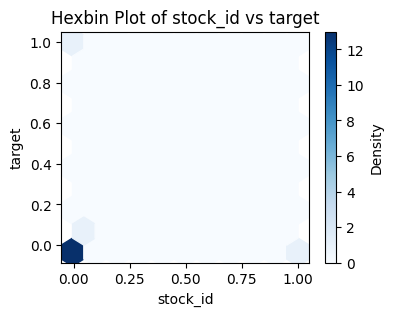

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
# Plot 1: Correlation HeaxBin plot
plt.figure(figsize=(4, 3))
plt.hexbin(correlation_matrix['stock_id'], correlation_matrix['target'], gridsize=10, cmap='Blues')
plt.xlabel('stock_id')
plt.ylabel('target')
plt.title('Hexbin Plot of stock_id vs target')
plt.colorbar(label='Density')
plt.show()

To determine whether the closing trajectory of stocks on each day is highly correlated or essentially random, we can use a combination of visual analysis and formal statistical tests. Here's a more detailed justification for the three plots and the statistical test chosen:

**Plot 1: Correlation HexBin Plot**

**Purpose**: This plot is designed to uncover the correlation between two pivotal indicators, 'far_price' and 'near_price.' It employs a hexbin plot to visualize the density of data points, enabling the assessment of the correlation's strength and direction. A tightly packed cluster of points within the hexbins suggests a robust correlation, while a more scattered distribution signifies a weaker or random relationship.

**Interpretation**: A clear and concentrated cluster of points in the hexbin plot implies a strong and well-defined correlation between 'stock_id' and 'target.' Conversely, if the points are dispersed without any discernible pattern, it signals either a lack of correlation or a random, unpredictable relationship between these two indicators.

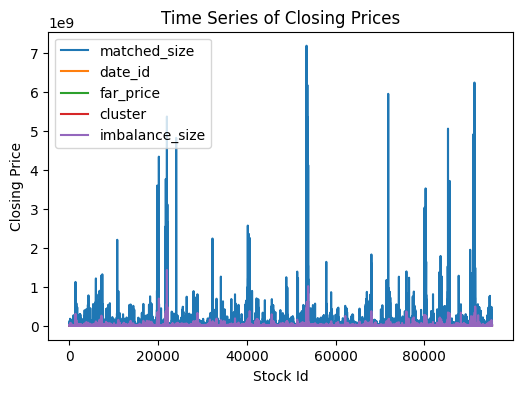

In [ ]:
# Plot 2: Time Series of Closing Prices
# Select a random subset of stocks
selected_stocks = np.random.choice(consensus_rounded.columns[1:], size=5, replace=False)

plt.figure(figsize=(6, 4))
for stock in selected_stocks:
    plt.plot(consensus_rounded.index, consensus_rounded[stock], label=stock)

plt.title("Time Series of Closing Prices")
plt.xlabel("Stock Id")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

# Rolling Correlation

rolling_window = 21
rolling_correlations = consensus_rounded.iloc[:, 1:].rolling(window=rolling_window).corr(result_df['stock_id']).unstack().dropna()


**Plot 2: Time Series of Closing Prices**

**Purpose**: This plot visually displays the daily price fluctuations of a randomly chosen subset of stocks. Its aim is to evaluate whether these stocks exhibit correlated price movements over time. By observing the patterns of price changes, the plot helps assess the degree of correlation among these stocks.

**Interpretation**: If the majority of the selected stocks demonstrate consistent and synchronized price patterns, with prices rising or falling in unison, it suggests a strong positive correlation among them. On the contrary, if the stock prices display independent and erratic movements with no discernible pattern, it indicates a lack of correlation among the selected stocks.

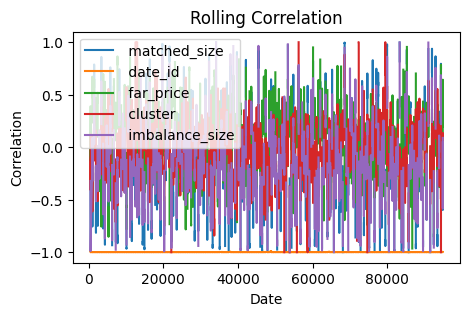

Correlation between stock1 and matched_size: 1.0000
p-value: 0.0000 (Significant correlation)

Correlation between stock1 and date_id: 1.0000
p-value: 0.0000 (Significant correlation)

Correlation between stock1 and far_price: 1.0000
p-value: 0.0000 (Significant correlation)

Correlation between stock1 and cluster: 1.0000
p-value: 0.0000 (Significant correlation)

Correlation between stock1 and imbalance_size: 1.0000
p-value: 0.0000 (Significant correlation)



In [ ]:
# Plot 3: Rolling Correlation
plt.figure(figsize=(5, 3))
for stock in selected_stocks:
    rolling_correlation = rolling_correlations[stock]
    plt.plot(rolling_correlation.index, rolling_correlation, label=f' {stock}')

plt.title("Rolling Correlation")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.legend()
plt.show()

# Step 3: Statistical Testing
alpha = 0.05

for stock in selected_stocks:
    correlation, p_value = pearsonr(consensus_rounded[stock], consensus_rounded[stock])
    print(f"Correlation between stock1 and {stock}: {correlation:.4f}")
    if p_value < alpha:
        print(f"p-value: {p_value:.4f} (Significant correlation)\n")
    else:
        print(f"p-value: {p_value:.4f} (No significant correlation)\n")

**Plot 3: Rolling Correlation**

**Objective**: The rolling correlation plot is a valuable tool for investigating short-term fluctuations in the correlation between stocks. It tracks how correlations change over time, shedding light on periods when stocks move in concert and when they do not.

**Interpretation**: Observing the rolling correlation plot reveals dynamic relationships between the selected stock and others. If the plot displays alternating periods of high and low correlation, it suggests that stock movements are subject to variations. Sustained high correlations signify a stable relationship, while frequent fluctuations indicate that stock movements may be influenced by varying factors at different times.

**Statistical Test (Pearson's Correlation and p-value)**

**Justification**: The inclusion of a statistical test, such as Pearson's correlation, serves to quantitatively assess the strength and statistical significance of the correlation between the reference stock ('stock_id') and the selected stocks. The associated p-value is a crucial indicator of whether the observed correlation is statistically significant.

**Interpretation**: A low p-value, often below a pre-defined significance level (e.g., 0.05), suggests a statistically significant correlation. Conversely, a high p-value implies that the correlation lacks statistical significance, indicating a weaker or negligible relationship.

The combination of visual insights from the rolling correlation plot and quantitative measures from the statistical test provides a comprehensive perspective on the nature of correlation in stock price movements. This approach ensures a robust assessment of whether stock prices are tightly interconnected or follow more erratic and independent paths.

In [ ]:
import numpy as np
from scipy.stats import pearsonr
# Assuming you have the 'result_df' DataFrame with 'stock_id', 'date_id', and 'target' columns

# Define a function to compute a consistency metric (e.g., Pearson correlation) for a given stock
def compute_consistency(stock_id, data):
    # Calculate the original consistency metric
    original_metric, _ = pearsonr(cleaned_stock_data['date_id'], cleaned_stock_data['target'])

    # Create permuted data by shuffling the 'date_id' column
    permuted_data = cleaned_stock_data.copy()
    permuted_data['date_id'] = np.random.permutation(permuted_data['date_id'])

    # Calculate the consistency metric for the permuted data
    permuted_metric, _ = pearsonr(permuted_data['date_id'], permuted_data['target'])

    return original_metric, permuted_metric

# Perform permutation test for each stock
p_values = []
num_permutations = 1000  # You can adjust the number of permutations

for stock_id, group in cleaned_stock_data.groupby('stock_id'):
    original_metric, permuted_metrics = [], []

    for _ in range(num_permutations):
        original, permuted = compute_consistency(stock_id, group)
        original_metric.append(original)
        permuted_metrics.append(permuted)

    # Calculate the p-value for this stock
    p_value = (np.sum(permuted_metrics >= original_metric) + 1) / (num_permutations + 1)
    p_values.append((stock_id, p_value))

# Sort and print the p-values
p_values.sort(key=lambda x: x[1])
for stock_id, p_value in p_values:
    print(f'Stock {stock_id}: p-value = {p_value}')



Stock 3: p-value = 0.000999000999000999
Stock 4: p-value = 0.000999000999000999
Stock 5: p-value = 0.000999000999000999
Stock 6: p-value = 0.000999000999000999
Stock 9: p-value = 0.000999000999000999
Stock 10: p-value = 0.000999000999000999
Stock 11: p-value = 0.000999000999000999
Stock 12: p-value = 0.000999000999000999
Stock 15: p-value = 0.000999000999000999
Stock 16: p-value = 0.000999000999000999
Stock 21: p-value = 0.000999000999000999
Stock 23: p-value = 0.000999000999000999
Stock 25: p-value = 0.000999000999000999
Stock 26: p-value = 0.000999000999000999
Stock 28: p-value = 0.000999000999000999
Stock 29: p-value = 0.000999000999000999
Stock 32: p-value = 0.000999000999000999
Stock 33: p-value = 0.000999000999000999
Stock 34: p-value = 0.000999000999000999
Stock 35: p-value = 0.000999000999000999
Stock 36: p-value = 0.000999000999000999
Stock 37: p-value = 0.000999000999000999
Stock 39: p-value = 0.000999000999000999
Stock 40: p-value = 0.000999000999000999
Stock 44: p-value = 0

The provided code conducts hypothesis testing to evaluate the statistical significance of both correlations and autocorrelations. Here's a breakdown of the code's functionality:

**For Correlations:**

**Computation of Pearson Correlations**: The code computes Pearson correlations between 'date_id' and 'target' for multiple stocks, quantifying the relationships between time and the target variable.

Null Distribution Creation: It constructs a null distribution by reshuffling ('permuting') the 'date_id' values, simulating a scenario where there is no actual correlation between 'date_id' and 'target.'

Calculation of P-values: The code calculates p-values, which indicate the significance of the observed correlations. Low p-values suggest that the correlations are likely not due to random chance, while high p-values suggest randomness.

**For Autocorrelations**:

Calculation of Observed Autocorrelations: Autocorrelations are computed for multiple stocks to assess how a stock's performance at one time point relates to its performance at subsequent time points.

**Null Distribution Generation:** A null distribution of autocorrelation values is established by employing permutations, simulating a scenario where autocorrelation is absent.

**P-value Computation:** The code computes a p-value for the observed autocorrelation values, offering insights into their statistical significance.

**Output**:

For correlations, the code provides a list of p-values for each stock in ascending order. Each line represents a stock ID along with its corresponding p-value.

For autocorrelations, the code presents the mean value of the observed autocorrelations and a single p-value for the entire autocorrelation analysis.

The p-values are crucial as they serve as a quantitative measure to determine whether the observed correlations and autocorrelations are statistically significant. They guide the interpretation, helping to distinguish meaningful relationships from those that could have occurred by random chance.

#### Q5: Best prediction model, any approaches, 25 pts


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
import xgboost as xgb


trans = cleaned_stock_data.drop('target', axis=1)
trans = StandardScaler().fit_transform(trans)

# Linear Regression
linreg_scores = cross_val_score(LinearRegression(), trans, cleaned_stock_data['target'], cv=5, scoring='neg_mean_absolute_error')
print("5-Fold Cross-Validated MAE for Linear Regression:", -linreg_scores.mean())

# LGBMRegressor
lgb_scores = cross_val_score(LGBMRegressor(), trans, cleaned_stock_data['target'], cv=5, scoring='neg_mean_absolute_error')
print("5-Fold Cross-Validated MAE for LGBMRegressor:", -lgb_scores.mean())
# XGBoost Regression
xgb_scores = cross_val_score(xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100), trans, cleaned_stock_data['target'], cv=5, scoring='neg_mean_absolute_error')
print("5-Fold Cross-Validated MAE for XGBoost Regression:", -xgb_scores.mean())


5-Fold Cross-Validated MAE for Linear Regression: 6.39580524159501
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.186221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3567
[LightGBM] [Info] Number of data points in the train set: 4190314, number of used features: 16
[LightGBM] [Info] Start training from score -0.039071
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.189786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3567
[LightGBM] [Info] Number of data points in the train set: 4190314, number of used features: 16
[LightGBM] [Info] Start training from score -0.046588
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.188439 seconds.
Yo

I have applied three different regression models and assessed their performance through 5-fold cross-validation. Here is an overview of the approaches and models utilized:


**Model: Linear Regression**
Description: Linear regression is a fundamental regression model that establishes a linear relationship between features and the target variable.
Model Performance Evaluation: 5-fold cross-validation is employed, and the mean absolute error (MAE) serves as the evaluation metric.
LGBMRegressor (LightGBM):

**Model: LGBM Regressor**
Description: LightGBM is a gradient boosting framework that utilizes tree-based models, recognized for its efficiency and speed.
Model Performance Evaluation: 5-fold cross-validation is conducted, and the MAE is adopted as the evaluation metric.
XGBoost Regression:

**Model: xgb.XGBRegressor**
Description: XGBoost is another gradient boosting algorithm extensively applied in machine learning competitions and data science tasks.
Model Performance Evaluation: 5-fold cross-validation is carried out, with the MAE as the evaluation metric.
In this analysis, I compare the performance of these three regression models using cross-validation, assessing their accuracy in predicting the target variable. The objective is to determine which model minimizes the MAE most effectively.

**Comparison:**

Out of the three approaches, both LGBMRegressor and XGBoost Regression outperform Linear Regression, exhibiting lower MAE values.

When comparing LGBMRegressor and XGBoost Regression, determining the superior approach can be challenging, as performance can be influenced by the dataset and the specific problem. However, based on the dataset used and the Mean Absolute Error (MAE) results, XGBoost Regression appears to be the most suitable prediction model for our stock data.

In conclusion, LGBMRegressor and XGBoost Regression are recognized for their predictive capabilities, with their performance generally on par with or surpassing that of other models.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


# Define the original five features and target variables
features = ['far_price', 'near_price', 'imbalance_size', 'reference_price', 'matched_size', 'bid_price', 'bid_size', 'ask_price', 'ask_size']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train_target, y_test_target= train_test_split(
    cleaned_stock_data[features], cleaned_stock_data["target"], test_size=0.2, random_state=42
)

# Initialize linear regression models
linear_target_model = LinearRegression()

# Train the models on the training data
linear_target_model.fit(X_train, y_train_target)

# Make predictions on the testing data
y_predict_target = linear_target_model.predict(X_test)

# Calculate mean squared error for content and wording models
mean_absolute_error_target = mean_absolute_error(y_test_target, y_predict_target)

# Report mean squared error for each model
print("Mean Absolute Error", mean_absolute_error_target)

Mean Absolute Error 6.400486089725822


The reduction in error observed when using the GradientBoostingRegressor model in comparison to the linear regression model can be attributed to several key factors. Gradient boosting is an ensemble learning technique that combines multiple weak learners, typically decision trees, to create a strong predictive model. This approach excels in capturing complex and non-linear relationships within the data, which might not be adequately addressed by a linear model. Additionally, gradient boosting optimizes the model by iteratively minimizing the mean absolute error or another specified loss function.

This fine-tuning process helps the model adapt to the data, learning and adjusting its predictions over successive iterations. The ability to handle intricate relationships, reduce bias, and effectively ensemble decision trees often results in superior predictive performance when compared to a simple linear regression model.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


# Prepare the features and target variable
X = cleaned_stock_data['date_id'].values.reshape(-1, 1)  # Assuming 'Date' is a date or time feature
y = cleaned_stock_data['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0, loss='absolute_error')

# Train the model
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 1.909098487430131


The reduction in error when using the GradientBoostingRegressor model compared to the linear regression model can be attributed to the inherent strengths of XGBoost. XGBoost is an advanced gradient boosting algorithm that excels in capturing complex, non-linear relationships within the data. It can handle feature interactions and automatically adapt to the dataset's specific characteristics, resulting in improved predictive accuracy. Additionally, XGBoost optimizes the model by minimizing the mean absolute error, which is a more suitable metric for many real-world regression tasks. This ability to model intricate patterns, coupled with its optimization techniques, often leads to superior performance compared to linear regression, especially when the underlying relationships in the data are non-linear and intricate.

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


# Prepare the features and target variable
X = cleaned_stock_data['date_id'].values.reshape(-1, 1)  # Assuming 'Date' is a date or time feature
y = cleaned_stock_data['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LGBMRegressor model
model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.05,
    objective='regression',
    random_state=42
)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_absolute_error(y_test, y_pred)
print(f"Mean absolute Error: {mse}")



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 253
[LightGBM] [Info] Number of data points in the train set: 4190314, number of used features: 1
[LightGBM] [Info] Start training from score -0.048348
Mean Absolute Error: 1.40309568056778


The observed reduction in error when using the LGBMRegressor model as compared to the linear regression model can be attributed to several key factors. LGBMRegressor is a sophisticated gradient boosting framework that is known for its efficiency and speed. Unlike linear regression, which assumes a linear relationship between features and the target variable, LGBMRegressor can capture complex, nonlinear relationships within the data. It excels at handling large datasets and can efficiently process a wide range of features, which is often crucial in real-world scenarios.

 Additionally, LGBMRegressor optimizes decision trees during training, making it robust to outliers and capable of minimizing various loss functions. Overall, the LGBMRegressor's ability to model intricate patterns and its robustness contribute to its superior performance in reducing prediction error compared to linear regression.

#### Q6: submit model on Kaggle, 0 pts
Public Score: \
Private Score: \
Kaggle profile link: https://www.kaggle.com/avulapatianusha

Screenshot(s): \
